In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set a consistent style
plt.style.available  # Example style, you can choose others like 'seaborn'
plt.style.use('seaborn-v0_8-ticks')
figsize = (20, 5)

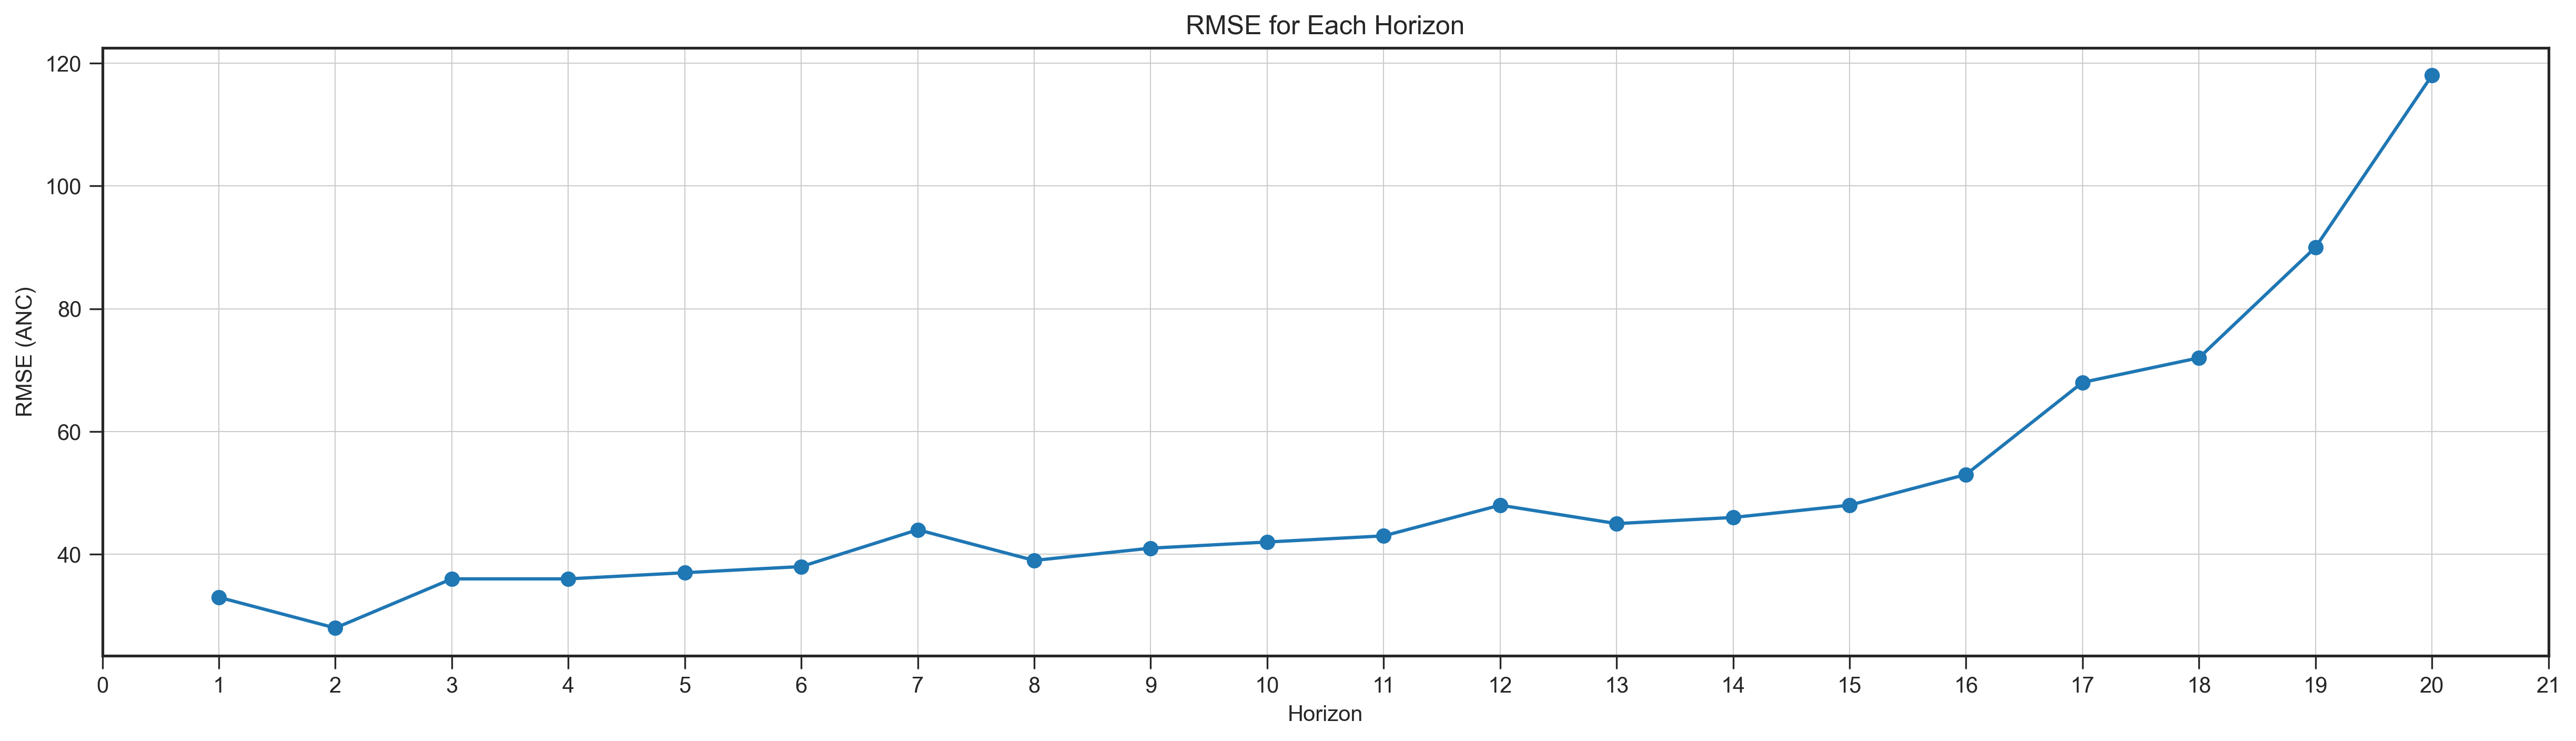

In [2]:
horizon = np.arange(1, 21, 1)  # Adjusted to match the length of rmse_adjusted
rmse = np.array([25, 33, 28, 36, 36, 37, 38, 44, 39, 41, 42, 43, 48, 45, 46, 48, 53, 68, 72, 90, 118])
rmse_adjusted = rmse[1:]
# Creating the plot
plt.figure(figsize=figsize, dpi=300)
plt.plot(horizon, rmse_adjusted, marker='o')  # Consistent color
plt.xlabel('Horizon')
plt.ylabel('RMSE (ANC)')
plt.title('RMSE for Each Horizon')
plt.grid(True, which='both', linestyle='-', linewidth='0.5') 
plt.xticks(np.arange(0, 22, 1)) 
plt.show()

35


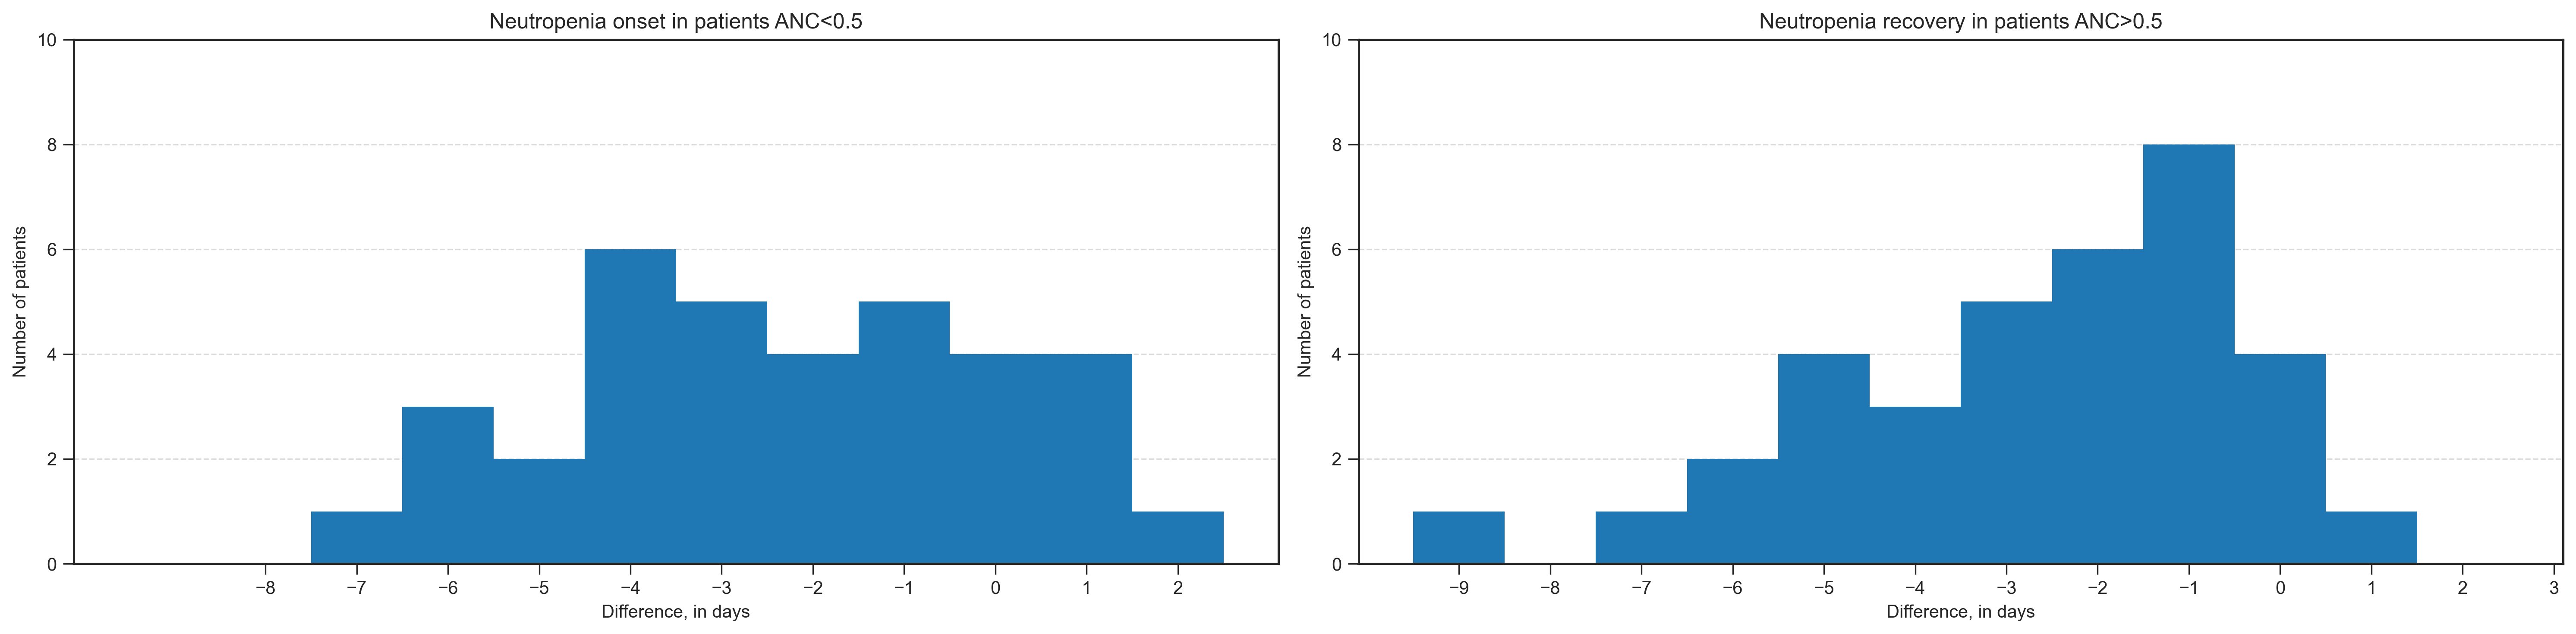

In [3]:
days_onset = np.array([-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2])
counts_onset = np.array([0, 1, 3, 2, 6, 5, 4, 5, 4, 4, 1])  # total must be 35 as per user requirement
print(counts_onset.sum())
assert counts_onset.sum() == 35, "Total number of patients must be 35"

data_onset = []
for day, count in zip(days_onset, counts_onset):
    data_onset.extend([day] * count)

df_onset = pd.DataFrame(data_onset, columns=['Difference in days'])

days_recovery = np.array([-9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3])
counts_recovery = np.array([1, 0, 1, 2, 4, 3, 5, 6, 8, 4, 1, 0, 0])  # total must be 35 as per user requirement
assert counts_recovery.sum() == 35, "Total number of patients must be 35"

data_recovery = []
for day, count in zip(days_recovery, counts_recovery):
    data_recovery.extend([day] * count)

df_recovery = pd.DataFrame(data_recovery, columns=['Difference in days'])

# For the histograms
fig, axes = plt.subplots(1, 2, figsize=figsize, dpi=300)

# Onset histogram
axes[0].hist(df_onset['Difference in days'], bins=np.arange(-9, 4) - 0.5)  # Consistent color
axes[0].set_xticks(days_onset)
axes[0].set_title('Neutropenia onset in patients ANC<0.5')
axes[0].set_xlabel('Difference, in days')
axes[0].set_ylabel('Number of patients')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_ylim(0, 10) 

# Recovery histogram
axes[1].hist(df_recovery['Difference in days'], bins=np.arange(-9, 4) - 0.5)  # Consistent color
axes[1].set_xticks(days_recovery)
axes[1].set_title('Neutropenia recovery in patients ANC>0.5')
axes[1].set_xlabel('Difference, in days')
axes[1].set_ylabel('Number of patients')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_ylim(0, 10)  

plt.tight_layout()
plt.show()

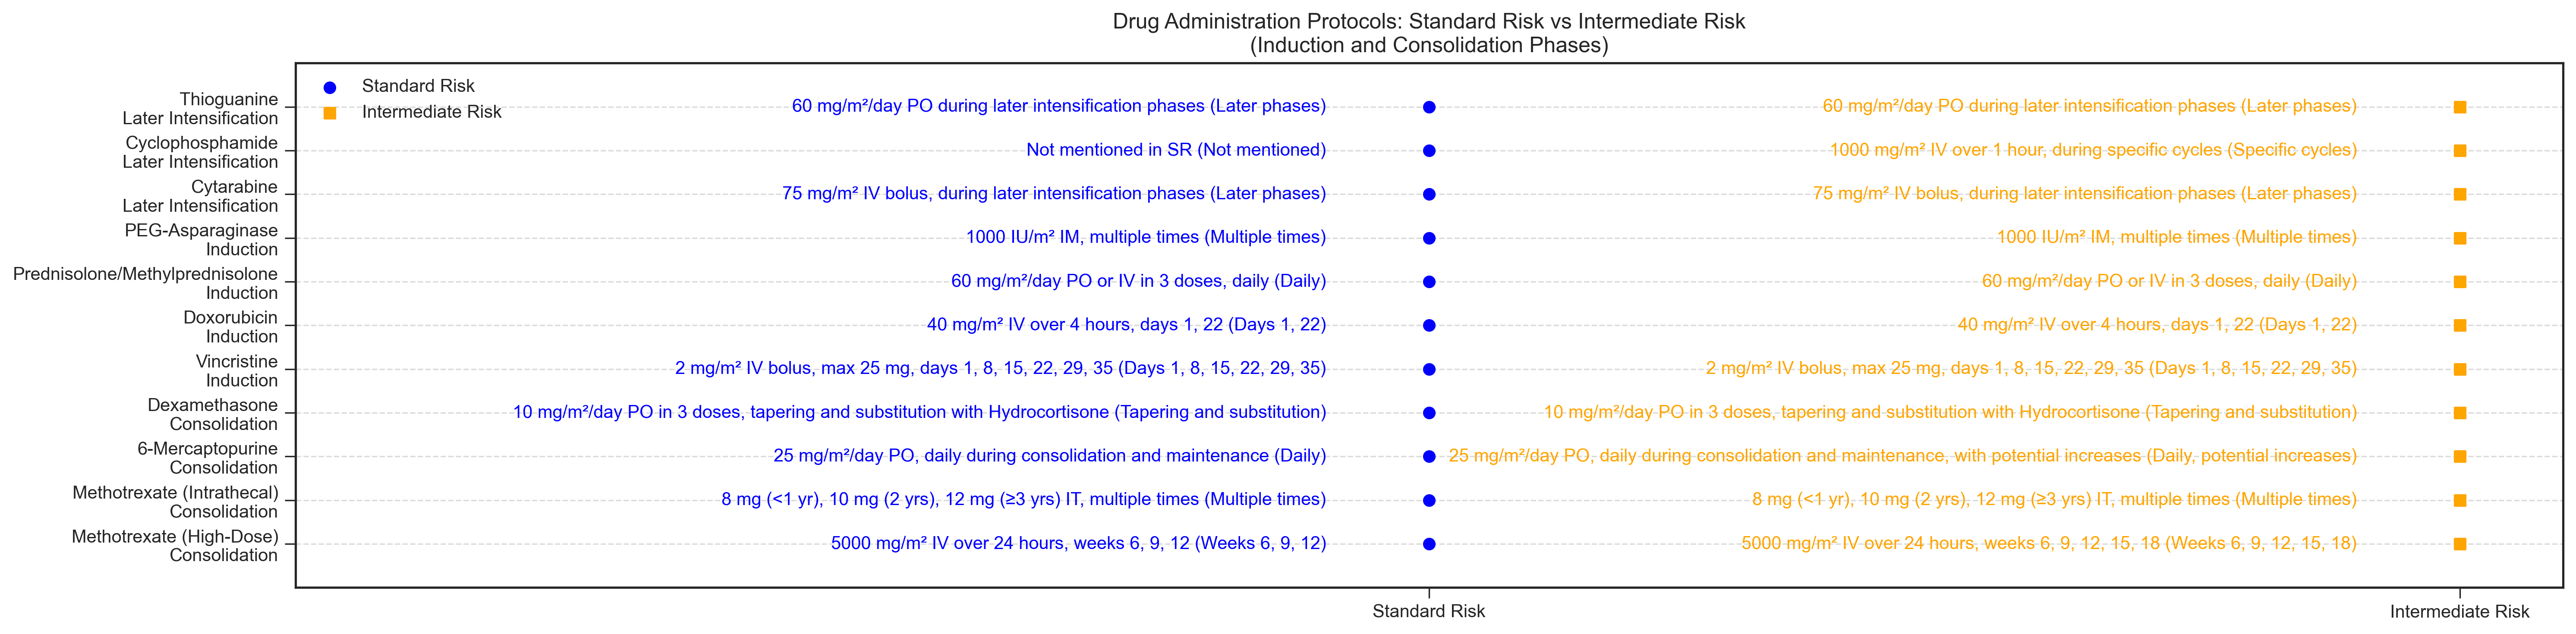

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Redefine the data to include phase information
phases = [
    "Induction", "Induction", "Induction", 
    "Consolidation", "Consolidation", 
    "Induction", "Consolidation", 
    "Consolidation", "Later Intensification", "Later Intensification", "Later Intensification"
]

sr_days = [
    "Days 1, 8, 15, 22, 29, 35", "Days 1, 22", 
    "Daily", "Weeks 6, 9, 12", 
    "Multiple times", 
    "Multiple times", "Daily", 
    "Tapering and substitution", "Later phases", 
    "Not mentioned", "Later phases"
]

ir_days = [
    "Days 1, 8, 15, 22, 29, 35", "Days 1, 22", 
    "Daily", "Weeks 6, 9, 12, 15, 18", 
    "Multiple times", 
    "Multiple times", "Daily, potential increases", 
    "Tapering and substitution", "Later phases", 
    "Specific cycles", "Later phases"
]

# Combine all data into a DataFrame
data = {
    "Drug": ["Vincristine", "Doxorubicin", "Prednisolone/Methylprednisolone", "Methotrexate (High-Dose)", "Methotrexate (Intrathecal)", "PEG-Asparaginase", "6-Mercaptopurine", "Dexamethasone", "Cytarabine", "Cyclophosphamide", "Thioguanine"],
    "Phase": phases,
    "Standard Risk (SR)": [
        "2 mg/m² IV bolus, max 25 mg, days 1, 8, 15, 22, 29, 35",  # Vincristine
        "40 mg/m² IV over 4 hours, days 1, 22",  # Doxorubicin
        "60 mg/m²/day PO or IV in 3 doses, daily",  # Prednisolone/Methylprednisolone
        "5000 mg/m² IV over 24 hours, weeks 6, 9, 12",  # Methotrexate (High-Dose)
        "8 mg (<1 yr), 10 mg (2 yrs), 12 mg (≥3 yrs) IT, multiple times",  # Methotrexate (Intrathecal)
        "1000 IU/m² IM, multiple times",  # PEG-Asparaginase
        "25 mg/m²/day PO, daily during consolidation and maintenance",  # 6-Mercaptopurine
        "10 mg/m²/day PO in 3 doses, tapering and substitution with Hydrocortisone",  # Dexamethasone
        "75 mg/m² IV bolus, during later intensification phases",  # Cytarabine
        "Not mentioned in SR",  # Cyclophosphamide
        "60 mg/m²/day PO during later intensification phases"  # Thioguanine
    ],
    "SR Days": sr_days,
    "Intermediate Risk (IR)": [
        "2 mg/m² IV bolus, max 25 mg, days 1, 8, 15, 22, 29, 35",  # Vincristine
        "40 mg/m² IV over 4 hours, days 1, 22",  # Doxorubicin
        "60 mg/m²/day PO or IV in 3 doses, daily",  # Prednisolone/Methylprednisolone
        "5000 mg/m² IV over 24 hours, weeks 6, 9, 12, 15, 18",  # Methotrexate (High-Dose)
        "8 mg (<1 yr), 10 mg (2 yrs), 12 mg (≥3 yrs) IT, multiple times",  # Methotrexate (Intrathecal)
        "1000 IU/m² IM, multiple times",  # PEG-Asparaginase
        "25 mg/m²/day PO, daily during consolidation and maintenance, with potential increases",  # 6-Mercaptopurine
        "10 mg/m²/day PO in 3 doses, tapering and substitution with Hydrocortisone",  # Dexamethasone
        "75 mg/m² IV bolus, during later intensification phases",  # Cytarabine
        "1000 mg/m² IV over 1 hour, during specific cycles",  # Cyclophosphamide
        "60 mg/m²/day PO during later intensification phases"  # Thioguanine
    ],
    "IR Days": ir_days
}

df = pd.DataFrame(data)

# Sort by phase for better visual representation
df_sorted = df.sort_values(by="Phase")

# Plot
fig, ax = plt.subplots(figsize=figsize, dpi=300)

y = np.arange(len(df_sorted))

# Scatter plot for SR and IR
ax.scatter(np.full(len(df_sorted), 1), y, marker='o', color='blue', label='Standard Risk')
ax.scatter(np.full(len(df_sorted), 2), y, marker='s', color='orange', label='Intermediate Risk')

# Annotate the plot with dosage information
for i in range(len(df_sorted)):
    ax.text(0.9, i, f"{df_sorted.iloc[i]['Standard Risk (SR)']} ({df_sorted.iloc[i]['SR Days']})", 
            verticalalignment='center', color='blue', ha='right')
    ax.text(1.9, i, f"{df_sorted.iloc[i]['Intermediate Risk (IR)']} ({df_sorted.iloc[i]['IR Days']})", 
            verticalalignment='center', color='orange', ha='right')

# Set the y-ticks and labels
ax.set_yticks(y)
ax.set_yticklabels(df_sorted["Drug"] + "\n" + df_sorted["Phase"])
ax.set_xticks([1, 2])
ax.set_xticklabels(['Standard Risk', 'Intermediate Risk'])

# Set plot limits and title
ax.set_xlim(-0.1, 2.1)
ax.set_ylim(-1, len(df_sorted))
ax.legend()
ax.set_title('Drug Administration Protocols: Standard Risk vs Intermediate Risk\n(Induction and Consolidation Phases)')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()